<a href="https://colab.research.google.com/github/Catherine-Nguyen88/project_chd/blob/main/chd_Isabella's_part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! git clone https://github.com/Catherine-Nguyen88/project_chd

Cloning into 'project_chd'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 62 (delta 38), reused 19 (delta 16), pack-reused 19
Receiving objects: 100% (62/62), 855.09 KiB | 10.82 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import training and testing datasets. see if we need to clean the data

In [ ]:
df_test = pd.read_csv('./project_chd/fhs_test.csv')
print( df_test.shape, '\n')
print( df_test.head(), '\n')

print(df_test.dtypes)
# count the nans in each variable
num_nans = df_test.isna().sum()
print("Number of NaNs for each variable:")
print(num_nans)

(1060, 17) 

   Unnamed: 0  sex  age  education  currentSmoker  cigsPerDay  BPMeds  \
0         674    0   58        1.0              1        20.0     0.0   
1        4070    0   51        3.0              0         0.0     0.0   
2        3150    0   44        2.0              1         9.0     0.0   
3        1695    0   40        2.0              1        20.0     0.0   
4        2692    1   58        2.0              1        20.0     0.0   

   prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                0             0         0      NaN  126.0   77.0  30.08   
1                0             0         0    264.0  135.0   83.0  26.68   
2                0             1         0      NaN  147.5   96.0  30.57   
3                0             0         0    271.0  138.5   88.0  27.24   
4                0             0         0    207.0  110.0   80.0  23.55   

   heartRate  glucose  TenYearCHD  
0       78.0      NaN           0  
1       60.0     74

In [ ]:
df_train = pd.read_csv('./project_chd/fhs_train.csv')
print(df_train.shape, '\n')
print(df_train.head(), '\n')
print(df_train.dtypes)

# count the nans in each variable
num_nans = df_train.isna().sum()
print("Number of NaNs for each variable:")
print(num_nans)

(3180, 17) 

   Unnamed: 0  sex  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1267    1   58        1.0              0         0.0     0.0   
1        1209    0   40        1.0              1        15.0     0.0   
2        2050    0   52        1.0              0         0.0     0.0   
3        1183    1   38        2.0              1        43.0     0.0   
4        3225    0   43        1.0              0         0.0     0.0   

   prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                0             0         0    220.0  143.0  104.0  29.85   
1                0             0         0    199.0  122.0   82.0  22.16   
2                0             0         0    275.0  112.0   71.0  25.68   
3                0             1         0    170.0  130.0   94.0  23.90   
4                0             0         0    202.0  124.0   92.0  21.26   

   heartRate  glucose  TenYearCHD  
0         75     87.0           1  
1         85     77

# Start here!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Clean & Transform Data

In [9]:
train_data = pd.read_csv('./project_chd/fhs_train.csv')
test_data = pd.read_csv('./project_chd/fhs_test.csv')

# clean training data
train_data1 = train_data.loc[:,['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]

train_final = train_data1.loc[:,['sex', 'currentSmoker', 'cigsPerDay',
                          'diabetes', 'totChol', 'sysBP',
                          'diaBP', 'BMI', 'TenYearCHD']]
train_final1 = train_final.dropna()

# clean testing data
test_data1 = train_data.loc[:,['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]
test_final = test_data1.loc[:,['sex', 'currentSmoker', 'cigsPerDay',
                                 'diabetes', 'totChol', 'sysBP',
                                 'diaBP', 'BMI', 'TenYearCHD']]
test_final1 = test_final.dropna()

# Trees

use tree to predict TenYearCHD

In [10]:
train_final1.head()

,sex,currentSmoker,cigsPerDay,diabetes,totChol,sysBP,diaBP,BMI,TenYearCHD
0,1,0,0.0,0,220.0,143.0,104.0,29.85,1
1,0,1,15.0,0,199.0,122.0,82.0,22.16,0
2,0,0,0.0,0,275.0,112.0,71.0,25.68,0
3,1,1,43.0,0,170.0,130.0,94.0,23.90,0
4,0,0,0.0,0,202.0,124.0,92.0,21.26,0


In [19]:
from sklearn.tree import DecisionTreeRegressor # import tree classifier
from sklearn.tree import plot_tree

# process data
y = train_final1['TenYearCHD']
vars = ['sex','currentSmoker','cigsPerDay','diabetes','totChol','sysBP','diaBP','BMI']
X = train_final1.loc[:,vars]

X_test = test_final1.loc[:,vars]
y_test = test_final1['TenYearCHD']

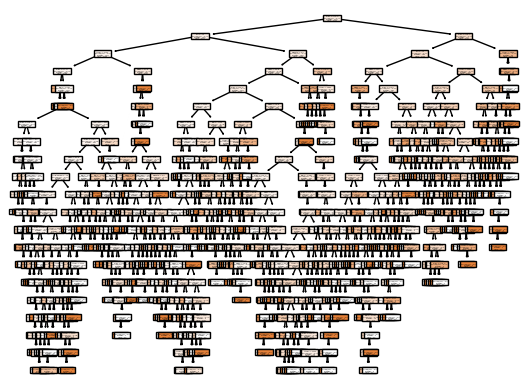

In [22]:
# fit decision tree
cart = DecisionTreeRegressor(max_depth = 20) # create a regression object
cart = cart.fit(X,y) # fit the regression
var_names = cart.feature_names_in_

# visualize results
plot_tree(cart,filled=True,feature_names=var_names)
plt.show()

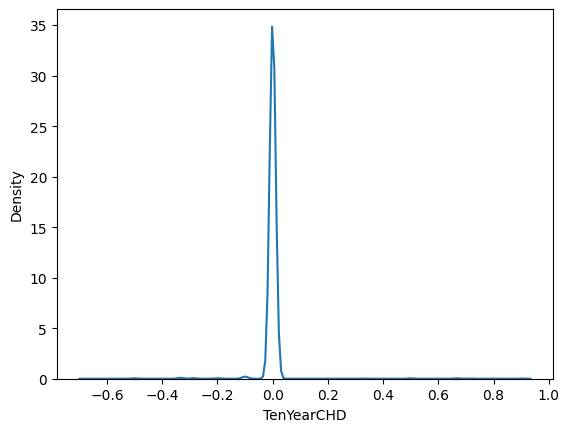

Rsq:  0.9765650378175706 

RMSE:  0.05493652853028063 



In [23]:
# make predictions on the test set
y_hat = cart.predict(X_test)

# residuals, rsq, rmse
e = y_test - y_hat
sns.kdeplot(e)
plt.show()
rsq = 1-np.sum(e**2)/np.sum((y_test - np.mean(y))**2)
RMSE = np.sqrt(np.mean(e**2))

print('Rsq: ', rsq, '\n')
print('RMSE: ', RMSE, '\n')